## Data Introduction

In [2]:
import pandas as pd

In [4]:
jobs = pd.read_csv("../data/fullsample.csv")

In [20]:
jobs.shape

(7395885, 12)

In [16]:
jobs.count()

JOBID        7395885
STATE        7395885
BEGIN        7395885
END          7395885
REQMEM       7395885
USEDMEM      7395885
REQTIME      7395885
USEDTIME     7395885
NODES        7395885
CPUS         7395885
PARTITION    7395885
EXITCODE     7395885
dtype: int64

In [10]:
jobs.columns

Index(['JOBID', 'STATE', 'BEGIN', 'END', 'REQMEM', 'USEDMEM', 'REQTIME',
       'USEDTIME', 'NODES', 'CPUS', 'PARTITION', 'EXITCODE'],
      dtype='object')

In [38]:
jobs_clean = jobs[jobs['STATE'] != 'RUNNING']

In [194]:
jobs.loc[jobs['JOBID'] == '24994289']

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE


In [42]:
jobs[jobs['STATE'] == 'RUNNING'].count()

JOBID        208
STATE        208
BEGIN        208
END          208
REQMEM       208
USEDMEM      208
REQTIME      208
USEDTIME     208
NODES        208
CPUS         208
PARTITION    208
EXITCODE     208
dtype: int64

In [40]:
jobs_clean.count()

JOBID        7395677
STATE        7395677
BEGIN        7395677
END          7395677
REQMEM       7395677
USEDMEM      7395677
REQTIME      7395677
USEDTIME     7395677
NODES        7395677
CPUS         7395677
PARTITION    7395677
EXITCODE     7395677
dtype: int64

In [48]:
jobs_clean['STATE'].value_counts()
#jobs['STATE'].value_counts()

STATE
COMPLETED              7375084
CANCELLED                 9055
FAILED                    3766
CANCELLED by 9201         1776
OUT_OF_MEMORY             1739
                        ...   
CANCELLED by 686562          1
CANCELLED by 891323          1
CANCELLED by 19853           1
CANCELLED by 494371          1
CANCELLED by 515423          1
Name: count, Length: 144, dtype: int64

In [52]:
jobs_cancelled = jobs[jobs['STATE'] == 'CANCELLED']
jobs_cancelled.shape

(9055, 12)

The **BEGIN** field indicates when the job was started (initiated on a computer node).

The **END** field indicates when the job ended (completed, failed, or was cancelled while running).

The **REQMEM** field is the amount of memory requested in megabytes. It can be per-core/CPU (Mc) or per-node (Mn).



In [9]:
# Jobs where memory was requested per core.
jobs[jobs['REQMEM'].str[-2:] == 'Mc'].head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
501,31776583_1,COMPLETED,2021-08-30T10:16:59,2021-09-01T02:04:11,4096Mc,1792.43M,14-00:00:00,1-15:47:12,1,1,production,0:0
502,31776584_12,COMPLETED,2021-08-30T10:17:00,2021-09-01T00:20:15,4096Mc,1792.43M,14-00:00:00,1-14:03:15,1,1,production,0:0
915,31793401_958,COMPLETED,2021-08-31T19:36:46,2021-09-01T00:37:11,4096Mc,2788.05M,05:00:00,05:00:25,1,1,production,0:0
916,31793401_987,COMPLETED,2021-08-31T20:33:46,2021-09-01T00:02:57,4096Mc,2779.27M,05:00:00,03:29:11,1,1,production,0:0


In [10]:
# Jobs where memory was requested per node.
jobs[jobs['REQMEM'].str[-2:] == 'Mn'].head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
0,30616928,RUNNING,2021-07-31T22:15:00,Unknown,2048Mn,0,10:04:00,67-22:14:22,1,1,production,0:0
1,30853133,COMPLETED,2021-08-06T11:36:09,2021-09-05T11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0
2,30858137,COMPLETED,2021-08-06T19:04:39,2021-09-05T19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0
3,30935078,COMPLETED,2021-08-09T16:52:51,2021-09-07T20:52:55,65536Mn,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:0
4,31364111_2,COMPLETED,2021-08-17T07:45:07,2021-09-10T16:45:24,16384Mn,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:0


The USEDMEM column is the amount of memory used in MB per node.

The requested time (REQTIME) and used time (USEDTIME) columns are in d-hh:mm:ss or hh:mm:ss for jobs less than one day in duration.

**NODES** is the number of servers used for the job. Most jobs are single node. For multiple node jobs, memory usage is the maximum over all nodes.

**CPUS** is the total number of CPU cores allocated to the job, and for multi-node jobs, this includes all nodes.

Most jobs are run in the "production" or "nogpfs" partition. The "debug" and "sam" partitions are test jobs that are expected to be short, and the "maxwell", "pascal", and "turing" partitions are for GPU resources.

In [12]:
jobs['PARTITION'].value_counts()

PARTITION
production        791
nogpfs            163
pascal             32
cgw-platypus        5
cgw-capra1          4
cgw-dougherty1      3
cgw-tbi01           1
turing              1
Name: count, dtype: int64

The **EXITCODE** gives the [exit code](https://www.agileconnection.com/article/overview-linux-exit-codes) for the job, with "0:0" indicating a successful job. Exit codes have two numbers, where if the first number is non-zero, it indicates a problem on the server side and if the second is nonzero, it indicates a problem on the user side.

In [14]:
jobs['EXITCODE'].value_counts()

EXITCODE
0:0     998
1:0       1
0:15      1
Name: count, dtype: int64

In [15]:
jobs[jobs['EXITCODE'] == '1:0']

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
18,31418105,NODE_FAIL,2021-08-19T10:09:50,2021-09-17T08:45:10,92160Mn,0,41-16:00:00,28-22:35:20,1,8,cgw-dougherty1,1:0


In [16]:
jobs[jobs['EXITCODE'] == '0:15']

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
42,31669402,CANCELLED,2021-08-28T10:53:59,2021-09-05T10:53:57,65536Mn,5229.75M,8-00:00:00,7-23:59:58,9,10,production,0:15


In [ ]:
jobs_completed = jobs[jobs['STATE'] == 'COMPLETED']

In [56]:
jobs_completed.shape

(7375084, 12)

In [76]:
jobs_completed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7375084 entries, 1 to 7395884
Data columns (total 12 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   JOBID      object
 1   STATE      object
 2   BEGIN      object
 3   END        object
 4   REQMEM     object
 5   USEDMEM    object
 6   REQTIME    object
 7   USEDTIME   object
 8   NODES      int64 
 9   CPUS       int64 
 10  PARTITION  object
 11  EXITCODE   object
dtypes: int64(2), object(10)
memory usage: 731.5+ MB


In [72]:
jobs_completed['END'].dtype

dtype('O')

In [ ]:
#df['Mycol'] = pd.to_datetime(df['Mycol'], format='%d%b%Y:%H:%M:%S.%f')

In [90]:
jobs_completed['END']

1          2021-09-05T11:36:32
2          2021-09-05T19:04:53
3          2021-09-07T20:52:55
4          2021-09-10T16:45:24
5          2021-09-06T16:17:34
                  ...         
7395880    2020-10-31T23:40:46
7395881    2020-10-31T23:40:38
7395882    2020-10-31T23:49:43
7395883    2020-10-31T23:51:40
7395884    2020-10-31T23:59:57
Name: END, Length: 7375084, dtype: object

In [92]:
jobs_completed['END'] = pd.to_datetime(jobs_completed['END'])
jobs_completed

C:\Users\Maria\AppData\Local\Temp\ipykernel_5960\4105075721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs_completed['END'] = pd.to_datetime(jobs_completed['END'])


,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
1,30853133,COMPLETED,2021-08-06T11:36:09,2021-09-05 11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0
2,30858137,COMPLETED,2021-08-06T19:04:39,2021-09-05 19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0
3,30935078,COMPLETED,2021-08-09T16:52:51,2021-09-07 20:52:55,65536Mn,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:0
4,31364111_2,COMPLETED,2021-08-17T07:45:07,2021-09-10 16:45:24,16384Mn,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:0
5,31364111_3,COMPLETED,2021-08-17T07:45:07,2021-09-06 16:17:34,16384Mn,9708.04M,24-09:00:00,20-08:32:27,1,1,production,0:0
...,...,...,...,...,...,...,...,...,...,...,...,...
7395880,25493434,COMPLETED,2020-10-31T23:39:00,2020-10-31 23:40:46,2000Mn,0.09M,2-00:00:00,00:01:46,1,1,sam,0:0
7395881,25493435,COMPLETED,2020-10-31T23:39:13,2020-10-31 23:40:38,2000Mn,187.92M,2-00:00:00,00:01:25,1,1,sam,0:0
7395882,25493476,COMPLETED,2020-10-31T23:46:29,2020-10-31 23:49:43,4096Mc,803.97M,12:00:00,00:03:14,1,1,production,0:0
7395883,25493515,COMPLETED,2020-10-31T23:49:44,2020-10-31 23:51:40,2000Mn,0.09M,2-00:00:00,00:01:56,1,1,sam,0:0


In [ ]:
#df['date'] = pd.to_datetime(df['date'])
#df.plot(x='date', y='count', kind='scatter', rot='vertical');

In [100]:
jobs_completed.plot(x='END', y=jobs_completed['END'].value_counts(), kind='line')

IndexError: index 312 is out of bounds for axis 0 with size 12

In [128]:
jobs_completed['END'].value_counts(sort=False)

END
2021-09-05 11:36:32    2
2021-09-05 19:04:53    1
2021-09-07 20:52:55    1
2021-09-10 16:45:24    1
2021-09-06 16:17:34    1
                      ..
2020-10-31 23:53:21    1
2020-10-31 23:21:34    1
2020-10-31 23:38:46    1
2020-10-31 23:40:38    1
2020-10-31 23:49:43    1
Name: count, Length: 4100858, dtype: int64

<Axes: xlabel='End Date'>

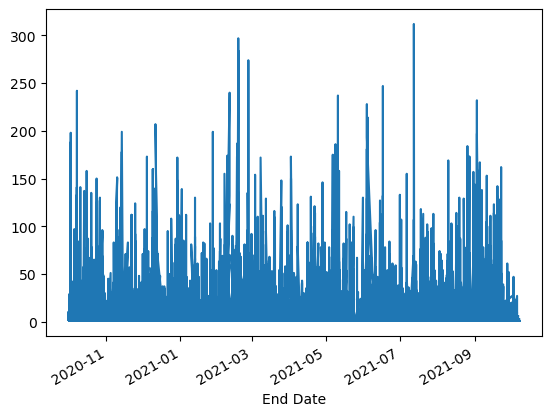

In [134]:
jobs_completed['END'].value_counts(sort=False).plot(kind='line', xlabel='End Date')

In [164]:
jobs_completed['END'].value_counts().loc[lambda x : x > 200]

END
2021-07-12 11:36:02    312
2021-02-17 16:45:58    297
2021-02-17 16:45:57    284
2021-02-25 23:56:42    274
2021-06-16 22:34:57    247
2020-10-07 15:03:10    242
2021-02-10 13:04:28    240
2021-05-10 20:55:20    237
2021-09-02 11:15:15    232
2021-06-03 17:31:18    228
2021-06-04 09:37:19    214
2020-12-11 09:02:40    207
Name: count, dtype: int64

The slurm_wrapper_ce5.log and slurm_wrapper_ce6.log files contain logs of jobs submitted from the Open Science Grid.

In [172]:
ce5 = pd.read_csv('../data/slurm_wrapper_ce5.log',
                  header=None,
                  names=['timestamp', 'user', 'code', 'duration', 'return_code', 'command'],
                  delimiter=' - ',
                  engine='python',)

ce5.head()

,timestamp,user,code,duration,return_code,command
0,2020-10-16 08:15:39.278699,user 0,retry 0,time 0.07347559928894043,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
1,2020-10-16 08:18:08.313309,user 0,retry 0,time 0.18363237380981445,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
2,2020-10-16 08:22:48.128689,user 0,retry 0,time 0.07547116279602051,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
3,2020-10-16 08:25:13.257408,user 0,retry 0,time 0.09484362602233887,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
4,2020-10-16 08:31:01.460723,user 0,retry 0,time 0.07498788833618164,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."


In [188]:
ce5.head(20)

,timestamp,user,code,duration,return_code,command
0,2020-10-16 08:15:39.278699,user 0,retry 0,time 0.07347559928894043,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
1,2020-10-16 08:18:08.313309,user 0,retry 0,time 0.18363237380981445,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
2,2020-10-16 08:22:48.128689,user 0,retry 0,time 0.07547116279602051,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
3,2020-10-16 08:25:13.257408,user 0,retry 0,time 0.09484362602233887,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
4,2020-10-16 08:31:01.460723,user 0,retry 0,time 0.07498788833618164,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
5,2020-10-16 08:31:57.896479,user 9201,retry 0,time 0.12703871726989746,returncode 0,"command ['/usr/bin/scancel', '24994284']"
6,2020-10-16 08:31:58.103189,user 9201,retry 0,time 0.11046957969665527,returncode 0,"command ['/usr/bin/scancel', '24994300']"
7,2020-10-16 08:31:58.103525,user 9201,retry 0,time 0.12061500549316406,returncode 0,"command ['/usr/bin/scancel', '24994286']"
8,2020-10-16 08:31:58.114098,user 9201,retry 0,time 0.24277329444885254,returncode 0,"command ['/usr/bin/scancel', '24994333']"
9,2020-10-16 08:31:58.125105,user 9201,retry 0,time 0.1543562412261963,returncode 0,"command ['/usr/bin/scancel', '24994285']"


In [186]:
ce5.sample(10)

,timestamp,user,code,duration,return_code,command
2286195,2021-04-03 15:53:49.165279,user 9201,retry 0,time 0.08108115196228027,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."
1040654,2020-12-05 15:26:21.195471,user 9201,retry 0,time 10.938936948776245,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."
2103818,2021-03-11 20:14:36.899072,user 9219,retry 0,time 15.013871669769287,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."
2609008,2021-04-21 13:30:56.049479,user 9201,retry 0,time 0.6164669990539551,returncode 0,"command ['/usr/bin/sacct', '-j', '28714584', '..."
2061660,2021-03-09 01:45:56.485773,user 9201,retry 0,time 0.5611968040466309,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."
1089424,2020-12-09 09:23:06.292334,user 9201,retry 0,time 20.096570014953613,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
1403178,2021-01-07 16:48:02.815250,user 9203,retry 0,time 9.495664834976196,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job']"
1989539,2021-03-06 07:53:47.704500,user 9201,retry 0,time 2.9002864360809326,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job']"
3106766,2021-06-04 03:24:12.511128,user 9202,retry 0,time 0.13658475875854492,returncode 0,"command ['/usr/bin/sbatch', '/tmp/condor_g_scr..."
2247638,2021-03-30 13:59:40.170274,user 9201,retry 0,time 1.430788516998291,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."


In [174]:
ce5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4770893 entries, 0 to 4770892
Data columns (total 6 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   timestamp    object
 1   user         object
 2   code         object
 3   duration     object
 4   return_code  object
 5   command      object
dtypes: object(6)
memory usage: 218.4+ MB


In [182]:
ce5.shape

(4770893, 6)

For this project, we are interested in jobs from user 9204 (the test user) where the command starts with '/usr/bin/sbatch', the returncode is non-zero and the time is greater than 15. These conditions indicate that the scheduler became unresponsive at that point in time.

In [192]:
ce5_user9204 = ce5.loc[(ce5['user'] == 'user 9204') & (ce5['return_code'] != 'returncode 0')]
ce5_user9204

,timestamp,user,code,duration,return_code,command
564,2020-10-16 08:59:38.926896,user 9204,retry 0,time 0.1231698989868164,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
565,2020-10-16 08:59:38.986336,user 9204,retry 1,time 0.05905652046203613,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
566,2020-10-16 08:59:39.133897,user 9204,retry 2,time 0.1472628116607666,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
683,2020-10-16 09:11:17.798315,user 9204,retry 0,time 0.02103400230407715,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
684,2020-10-16 09:11:17.817819,user 9204,retry 1,time 0.019124746322631836,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '..."
...,...,...,...,...,...,...
4729891,2021-10-02 16:01:42.684681,user 9204,retry 0,time 21.28179407119751,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-u..."
4730187,2021-10-02 16:34:51.632533,user 9204,retry 0,time 20.060213804244995,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-u..."
4730701,2021-10-02 17:33:19.126956,user 9204,retry 0,time 20.50884461402893,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-j..."
4730705,2021-10-02 17:33:39.156362,user 9204,retry 1,time 20.028889894485474,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-j..."
